#  TMDB Top-Rated Movies — Exploratory Data Analysis (EDA)

This notebook explores the **TMDB Top-Rated Movies Dataset**, containing **10,000+ movies** collected from the TMDB API.

The objective of this notebook is to:
- Understand the dataset structure  
- Perform Exploratory Data Analysis (EDA)  
- Analyze trends in popularity, votes, and release years  
- Prepare the data for machine learning use cases  

---

##  Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


---

##  Load Dataset

The dataset is loaded directly from the Kaggle input directory.


In [2]:
csv_path = None
for root, _, files in os.walk("/kaggle/input"):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)

print("Loaded file:", csv_path)

df = pd.read_csv(csv_path)
df.head()


Loaded file: /kaggle/input/tmdb-top-rated-movies-dataset-for-eda-and-ml-10k/tmdb_top_rated_movies.csv


,id,original_language,original_title,popularity,release_date,vote_count
0,278,en,The Shawshank Redemption,33.0609,1994-09-23,29408
1,238,en,The Godfather,31.0195,1972-03-14,22196
2,240,en,The Godfather Part II,16.4137,1974-12-20,13419
3,424,en,Schindler's List,14.9015,1993-12-15,16938
4,389,en,12 Angry Men,11.0014,1957-04-10,9607


---

##  Dataset Shape


In [3]:
df.shape


(10000, 6)

---

##  Dataset Information


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_language  10000 non-null  object 
 2   original_title     10000 non-null  object 
 3   popularity         10000 non-null  float64
 4   release_date       9998 non-null   object 
 5   vote_count         10000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


---

##  Missing Values Analysis


In [5]:
df.isnull().sum()


id                   0
original_language    0
original_title       0
popularity           0
release_date         2
vote_count           0
dtype: int64

---

##  Data Preparation

- Convert `release_date` to datetime  
- Create a `release_year` feature for time-based analysis  


In [6]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

df.head()


,id,original_language,original_title,popularity,release_date,vote_count,release_year
0,278,en,The Shawshank Redemption,33.0609,1994-09-23,29408,1994.0
1,238,en,The Godfather,31.0195,1972-03-14,22196,1972.0
2,240,en,The Godfather Part II,16.4137,1974-12-20,13419,1974.0
3,424,en,Schindler's List,14.9015,1993-12-15,16938,1993.0
4,389,en,12 Angry Men,11.0014,1957-04-10,9607,1957.0


---

##  Distribution of Original Languages


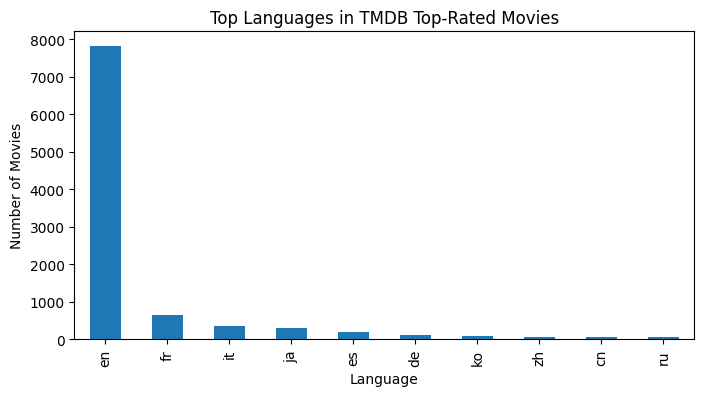

In [7]:
df["original_language"].value_counts().head(10).plot(
    kind="bar",
    figsize=(8,4),
    title="Top Languages in TMDB Top-Rated Movies"
)
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.show()


---

##  Popularity vs Vote Count


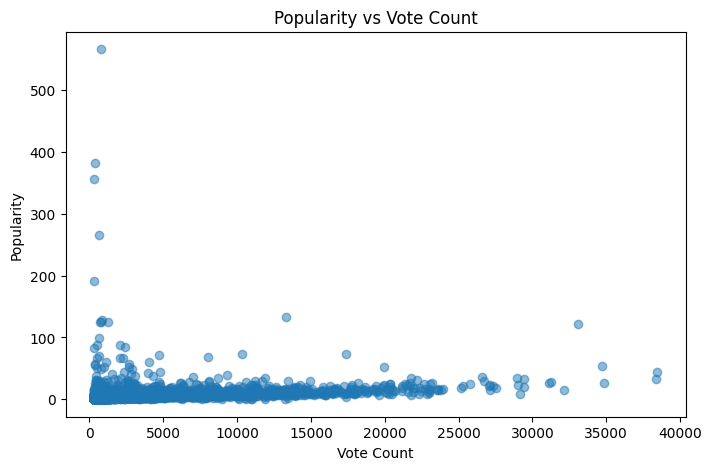

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df["vote_count"], df["popularity"], alpha=0.5)
plt.title("Popularity vs Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Popularity")
plt.show()


---

##  Movies Released Over Time


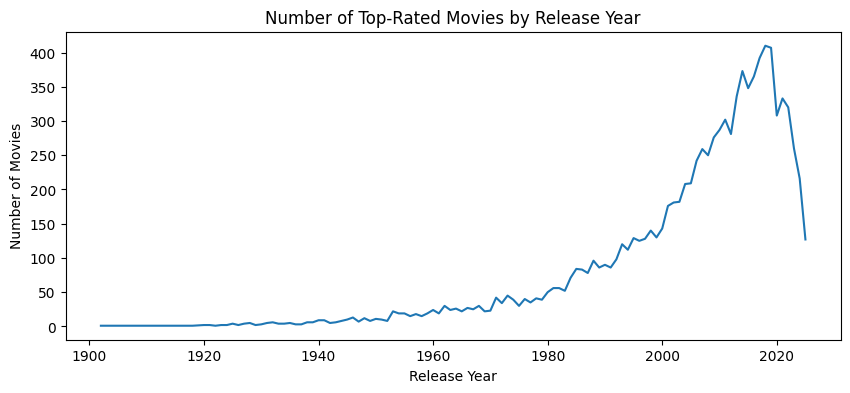

In [9]:
df["release_year"].value_counts().sort_index().plot(
    figsize=(10,4),
    title="Number of Top-Rated Movies by Release Year"
)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.show()


---

##  Correlation Analysis


In [10]:
df[["popularity", "vote_count"]].corr()


,popularity,vote_count
popularity,1.000000,0.243848
vote_count,0.243848,1.000000


---

##  Machine Learning Readiness

This dataset is suitable for:
- Popularity prediction  
- Recommendation systems  
- Clustering movies by engagement  
- Time-series trend analysis  

ML-ready feature subset:


In [11]:
ml_df = df[["popularity", "vote_count", "release_year"]].dropna()
ml_df.head()


,popularity,vote_count,release_year
0,33.0609,29408,1994.0
1,31.0195,22196,1972.0
2,16.4137,13419,1974.0
3,14.9015,16938,1993.0
4,11.0014,9607,1957.0


---

##  Key Insights

- English-language movies dominate the top-rated list  
- Vote count shows a strong relationship with popularity  
- Most top-rated movies are concentrated between the 1990s and 2010s  
- The dataset is clean and ML-ready  

---

##  Next Steps

- Add genre metadata from TMDB  
- Build a recommendation system  
- Train regression models to predict popularity  
- Perform clustering on movie engagement  

---

###  If you found this notebook useful, please upvote and fork!
